In [124]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [125]:
import cv2
import math
import keras
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Layer
from keras import backend as K 
from keras.utils import np_utils
from keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from keras.callbacks import LearningRateScheduler
from keras.layers import Conv2D, MaxPool2D,Dropout, Dense, Input, concatenate,GlobalAveragePooling2D, AveragePooling2D,Flatten

## **Dataset analysis**

In [130]:
cd val_filtered

/Users/jay/ABC/Sem II/Major Project/filtered_Categories/final_40_categories/val_filtered


In [131]:
!ls

apartment_building-outdoor market
autorickshaw               office
bus_station                open_field
car_interior               pharmacy
electronics_store          religious_procession
farm                       restaurant
forest                     river
garden                     rural_area
highway                    shopping_mall
hospital                   street
hospital_room              supermarket
hotel_room                 taxi
house                      tea_stall
lake-natural               temple
livingroom                 train_station-platform


In [132]:
rm -f -r .DS_Store

In [133]:
cd ..

/Users/jay/ABC/Sem II/Major Project/filtered_Categories/final_40_categories


In [134]:
import os

train_dir = 'train_filtered/'
val_dir = 'val_filtered/'

classes = []

# Calculate the number of images in each class for the training set
train_counts = {}
for class_name in os.listdir(train_dir):
    classes.append(class_name)
    class_dir = os.path.join(train_dir, class_name)
    train_counts[class_name] = len(os.listdir(class_dir))

# Calculate the number of images in each class for the validation set
val_counts = {}
for class_name in os.listdir(val_dir):
    class_dir = os.path.join(val_dir, class_name)
    val_counts[class_name] = len(os.listdir(class_dir))

In [135]:
print(val_counts)

{'farm': 100, 'forest': 100, 'supermarket': 100, 'religious_procession': 100, 'pharmacy': 100, 'restaurant': 100, 'river': 100, 'autorickshaw': 100, 'train_station-platform': 100, 'office': 107, 'garden': 100, 'highway': 100, 'rural_area': 100, 'electronics_store': 100, 'hotel_room': 100, 'apartment_building-outdoor': 100, 'hospital': 100, 'shopping_mall': 100, 'lake-natural': 100, 'bus_station': 100, 'car_interior': 100, 'house': 100, 'street': 100, 'livingroom': 100, 'market': 116, 'taxi': 100, 'open_field': 100, 'tea_stall': 100, 'temple': 100, 'hospital_room': 100}


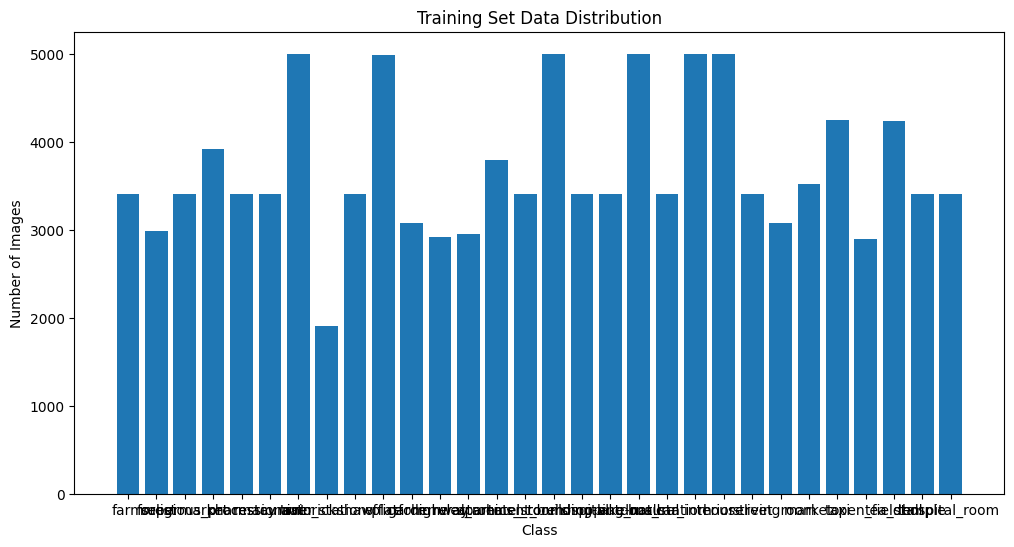

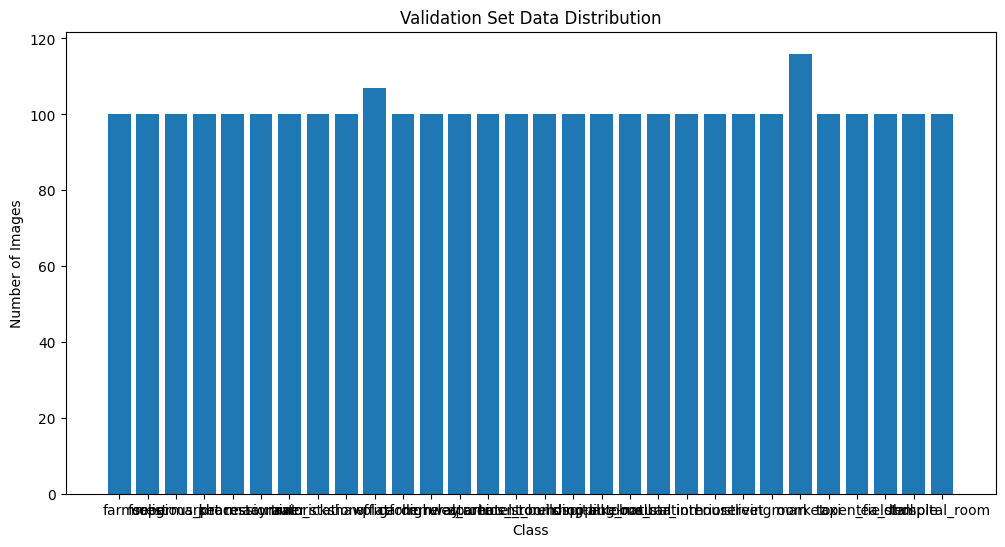

In [136]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Plot the distribution of data in the training set
plt.figure(figsize=(12,6))
plt.bar(train_counts.keys(), train_counts.values())
plt.title('Training Set Data Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# Plot the distribution of data in the validation set
plt.figure(figsize=(12,6))
plt.bar(val_counts.keys(), val_counts.values())
plt.title('Validation Set Data Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# data augumentation

In [137]:
# Define the image data generator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#val datagen
val_datagen = ImageDataGenerator(rescale=1./255)

In [138]:

img_size = (224, 224)
batch_size = 32

# Load the images and labels for the training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the images and labels for the validation set
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 110277 images belonging to 30 classes.
Found 3022 images belonging to 30 classes.


## Model

In [139]:
# Define the model
input_shape = (224, 224, 3)
num_classes = 30

In [140]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [141]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

In [142]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_470 (Conv2D)            (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 111, 111, 32  96         ['conv2d_470[0][0]']             
 Normalization)                 )                                                      

In [143]:
for layer in base_model.layers:
    layer.trainable = False

In [144]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [145]:
model = Model(inputs=base_model.input, outputs=predictions)

In [146]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_470 (Conv2D)            (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 111, 111, 32  96         ['conv2d_470[0][0]']             
 Normalization)                 )                                                           

In [147]:
from tensorflow.keras.optimizers.legacy import Adam

model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [148]:
# Checking Model Summary
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_470 (Conv2D)            (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 111, 111, 32  96         ['conv2d_470[0][0]']             
 Normalization)                 )                                                           

In [149]:
plot_model(model, to_file="my_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [150]:
!mkdir 'inceptionv3_scratch_30'

In [151]:
checkpoint_filepath = 'inceptionv3_scratch_30'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=False)

In [152]:
!pwd

/Users/jay/ABC/Sem II/Major Project/filtered_Categories/final_40_categories


In [153]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [154]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples/val_generator.batch_size,
    epochs=15,callbacks=[model_checkpoint_callback]
)

Epoch 1/15
3447/3446 [==============================] - ETA: 0s - loss: 2.0224 - accuracy: 0.4357

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 982s 284ms/step - loss: 2.0224 - accuracy: 0.4357 - val_loss: 1.7205 - val_accuracy: 0.4755
Epoch 2/15
3447/3446 [==============================] - ETA: 0s - loss: 1.7195 - accuracy: 0.4788

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 1068s 310ms/step - loss: 1.7195 - accuracy: 0.4788 - val_loss: 1.5438 - val_accuracy: 0.5357
Epoch 3/15
3447/3446 [==============================] - ETA: 0s - loss: 1.7042 - accuracy: 0.4859

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 1041s 302ms/step - loss: 1.7042 - accuracy: 0.4859 - val_loss: 1.5530 - val_accuracy: 0.5529
Epoch 4/15
3447/3446 [==============================] - ETA: 0s - loss: 1.7064 - accuracy: 0.4848

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 906s 263ms/step - loss: 1.7064 - accuracy: 0.4848 - val_loss: 1.5254 - val_accuracy: 0.5563
Epoch 5/15
3447/3446 [==============================] - ETA: 0s - loss: 1.6956 - accuracy: 0.4888

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 908s 264ms/step - loss: 1.6956 - accuracy: 0.4888 - val_loss: 1.6190 - val_accuracy: 0.5533
Epoch 6/15
3447/3446 [==============================] - ETA: 0s - loss: 1.6982 - accuracy: 0.4906

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 921s 267ms/step - loss: 1.6982 - accuracy: 0.4906 - val_loss: 1.5976 - val_accuracy: 0.5437
Epoch 7/15
3447/3446 [==============================] - ETA: 0s - loss: 1.6844 - accuracy: 0.4933

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 922s 267ms/step - loss: 1.6844 - accuracy: 0.4933 - val_loss: 1.5729 - val_accuracy: 0.5334
Epoch 8/15
3447/3446 [==============================] - ETA: 0s - loss: 1.6852 - accuracy: 0.4917

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 920s 267ms/step - loss: 1.6852 - accuracy: 0.4917 - val_loss: 1.4960 - val_accuracy: 0.5529
Epoch 9/15
3447/3446 [==============================] - ETA: 0s - loss: 1.6959 - accuracy: 0.4890

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 895s 260ms/step - loss: 1.6959 - accuracy: 0.4890 - val_loss: 1.5573 - val_accuracy: 0.5251
Epoch 10/15
3447/3446 [==============================] - ETA: 0s - loss: 1.6951 - accuracy: 0.4907

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 987s 286ms/step - loss: 1.6951 - accuracy: 0.4907 - val_loss: 1.6891 - val_accuracy: 0.5165
Epoch 11/15
3447/3446 [==============================] - ETA: 0s - loss: 1.6924 - accuracy: 0.4900

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 1047s 304ms/step - loss: 1.6924 - accuracy: 0.4900 - val_loss: 1.6624 - val_accuracy: 0.5053
Epoch 12/15
3447/3446 [==============================] - ETA: 0s - loss: 1.6941 - accuracy: 0.4922

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 1012s 294ms/step - loss: 1.6941 - accuracy: 0.4922 - val_loss: 1.6001 - val_accuracy: 0.5702
Epoch 13/15
3447/3446 [==============================] - ETA: 0s - loss: 1.6906 - accuracy: 0.4917

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 985s 286ms/step - loss: 1.6906 - accuracy: 0.4917 - val_loss: 1.6296 - val_accuracy: 0.4927
Epoch 14/15
3447/3446 [==============================] - ETA: 0s - loss: 1.6761 - accuracy: 0.4981

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 954s 277ms/step - loss: 1.6761 - accuracy: 0.4981 - val_loss: 1.5672 - val_accuracy: 0.5351
Epoch 15/15
3447/3446 [==============================] - ETA: 0s - loss: 1.6883 - accuracy: 0.4912

INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_30/assets


3446/3446 [==============================] - 980s 284ms/step - loss: 1.6883 - accuracy: 0.4912 - val_loss: 1.6702 - val_accuracy: 0.5242


In [155]:
model.save('15_inceptionv3_epochs_30.h5')

In [156]:
print(history.history)

{'loss': [2.0224039554595947, 1.7195402383804321, 1.7042477130889893, 1.706387996673584, 1.6956425905227661, 1.6982080936431885, 1.684386968612671, 1.6851897239685059, 1.6958770751953125, 1.695129632949829, 1.6923545598983765, 1.694110631942749, 1.6906235218048096, 1.676079511642456, 1.6883430480957031], 'accuracy': [0.43569374084472656, 0.4787580370903015, 0.48593994975090027, 0.4847792387008667, 0.4887601137161255, 0.4905737340450287, 0.4933122992515564, 0.49169817566871643, 0.48901402950286865, 0.49074602127075195, 0.4899933934211731, 0.4922150671482086, 0.49168911576271057, 0.49808210134506226, 0.49118128418922424], 'val_loss': [1.7204636335372925, 1.5438376665115356, 1.552994966506958, 1.525382399559021, 1.6189565658569336, 1.5975548028945923, 1.5729107856750488, 1.495980143547058, 1.5573333501815796, 1.6890968084335327, 1.6624488830566406, 1.600062608718872, 1.6295619010925293, 1.5671969652175903, 1.6702425479888916], 'val_accuracy': [0.47551289200782776, 0.535737931728363, 0.552

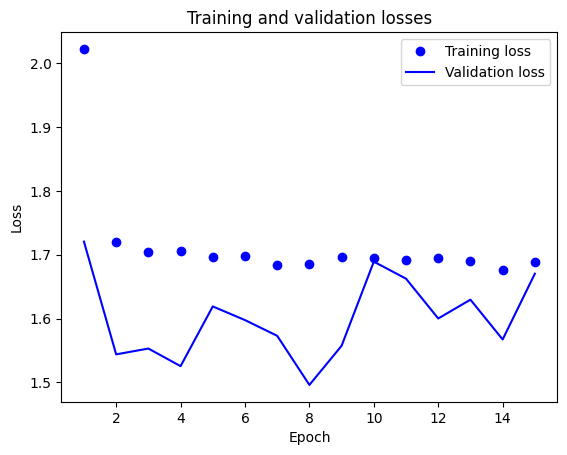

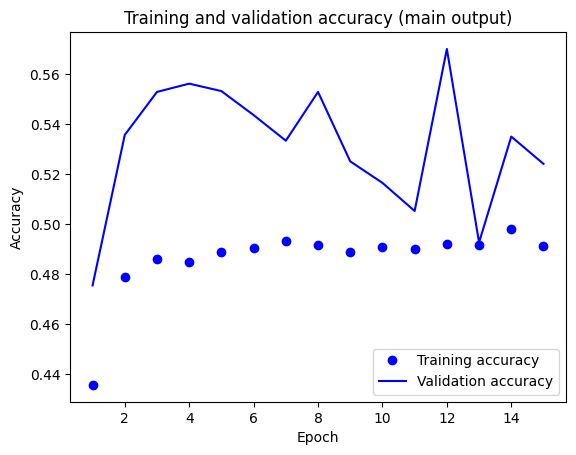

"# Plot the auxiliary outputs accuracy\nplt.plot(epochs, aux1_accuracy, 'bo', label='Training accuracy (aux 1)')\nplt.plot(epochs, aux2_accuracy, 'go', label='Training accuracy (aux 2)')\nplt.plot(epochs, val_aux1_accuracy, 'b', label='Validation accuracy (aux 1)')\nplt.plot(epochs, val_aux2_accuracy, 'g', label='Validation accuracy (aux 2)')\nplt.title"

In [157]:
import matplotlib.pyplot as plt

# Extract the losses and accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


# Plot the losses
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the main output accuracy
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy (main output)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

'''# Plot the auxiliary outputs accuracy
plt.plot(epochs, aux1_accuracy, 'bo', label='Training accuracy (aux 1)')
plt.plot(epochs, aux2_accuracy, 'go', label='Training accuracy (aux 2)')
plt.plot(epochs, val_aux1_accuracy, 'b', label='Validation accuracy (aux 1)')
plt.plot(epochs, val_aux2_accuracy, 'g', label='Validation accuracy (aux 2)')
plt.title'''


In [158]:
mkdir 'inceptionv3_scratch_1_base_unfreezed_30'

In [159]:
import tensorflow as tf

model = keras.models.load_model('15_inceptionv3_epochs_30.h5')

In [160]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_470 (Conv2D)            (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 111, 111, 32  96         ['conv2d_470[0][0]']             
 Normalization)                 )                                                           

In [161]:
for layer in model.layers:
    layer.trainable = True

In [162]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_470 (Conv2D)            (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 111, 111, 32  96         ['conv2d_470[0][0]']             
 Normalization)                 )                                                           

In [165]:
from tensorflow.keras.optimizers.legacy import Adam

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [166]:
ls

15_inceptionv3_epochs_30.h5
30_inceptionv3_epochs.h5
added/
inceptionv3.ipynb
inceptionv3_scratch_1_base_unfreezed_30/
inceptionv3_scratch_30/
inceptionv3_scratch_40/
train_filtered/
val_filtered/


In [167]:
# Save our model using specified conditions
checkpoint_filepath = 'inceptionv3_scratch_1_base_unfreezed_30'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
#checkpoint = ModelCheckpoint("checkpoints/vgg16_12.h5", monitor='accuracy', verbose=1, save_best_only=True )
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

In [168]:
# Train the model
history2 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples/val_generator.batch_size,
    epochs=10,callbacks=[model_checkpoint_callback,early]
)

Epoch 1/10
3447/3446 [==============================] - ETA: 0s - loss: 1.2509 - accuracy: 0.6172

INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30/assets


3446/3446 [==============================] - 2398s 693ms/step - loss: 1.2509 - accuracy: 0.6172 - val_loss: 1.0133 - val_accuracy: 0.7035
Epoch 2/10
3447/3446 [==============================] - ETA: 0s - loss: 0.9096 - accuracy: 0.7177

INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30/assets


3446/3446 [==============================] - 2413s 700ms/step - loss: 0.9096 - accuracy: 0.7177 - val_loss: 0.7823 - val_accuracy: 0.7690
Epoch 3/10
3446/3446 [==============================] - 2287s 663ms/step - loss: 0.7930 - accuracy: 0.7501 - val_loss: 0.8348 - val_accuracy: 0.7555
Epoch 4/10
3447/3446 [==============================] - ETA: 0s - loss: 0.7186 - accuracy: 0.7706

INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30/assets


3446/3446 [==============================] - 2320s 673ms/step - loss: 0.7186 - accuracy: 0.7706 - val_loss: 0.7587 - val_accuracy: 0.7713
Epoch 5/10
3447/3446 [==============================] - ETA: 0s - loss: 0.6653 - accuracy: 0.7862

INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30/assets


3446/3446 [==============================] - 2323s 674ms/step - loss: 0.6653 - accuracy: 0.7862 - val_loss: 0.7633 - val_accuracy: 0.7723
Epoch 6/10
3446/3446 [==============================] - 2400s 696ms/step - loss: 0.6226 - accuracy: 0.7969 - val_loss: 0.7820 - val_accuracy: 0.7723
Epoch 7/10
3447/3446 [==============================] - ETA: 0s - loss: 0.5784 - accuracy: 0.8097

INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30/assets


3446/3446 [==============================] - 2444s 709ms/step - loss: 0.5784 - accuracy: 0.8097 - val_loss: 0.7071 - val_accuracy: 0.7879
Epoch 8/10
3446/3446 [==============================] - 2415s 701ms/step - loss: 0.5510 - accuracy: 0.8174 - val_loss: 0.7781 - val_accuracy: 0.7707
Epoch 9/10
3447/3446 [==============================] - ETA: 0s - loss: 0.5224 - accuracy: 0.8259

INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30/assets


3446/3446 [==============================] - 2368s 687ms/step - loss: 0.5224 - accuracy: 0.8259 - val_loss: 0.6961 - val_accuracy: 0.7952
Epoch 10/10
3446/3446 [==============================] - 2338s 678ms/step - loss: 0.4959 - accuracy: 0.8329 - val_loss: 0.8031 - val_accuracy: 0.7723


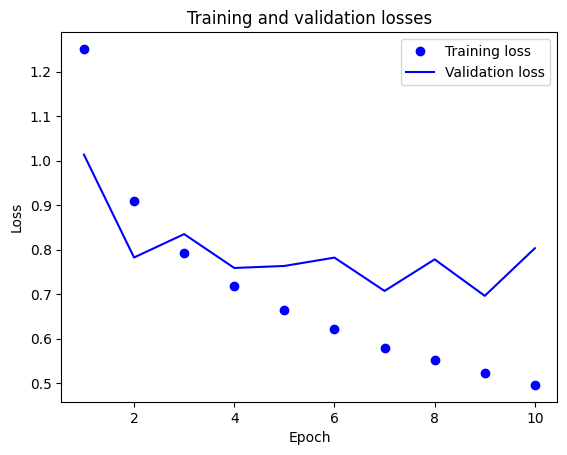

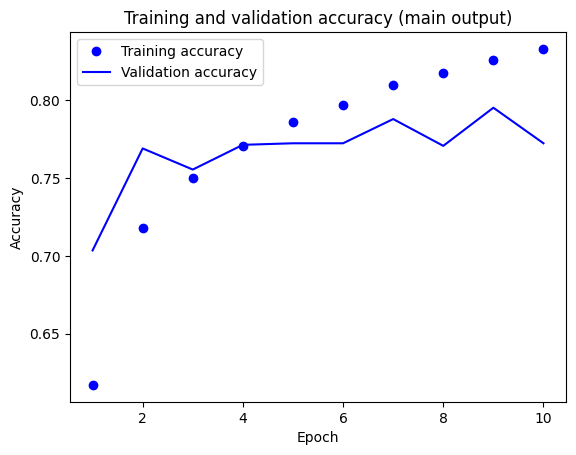

"# Plot the auxiliary outputs accuracy\nplt.plot(epochs, aux1_accuracy, 'bo', label='Training accuracy (aux 1)')\nplt.plot(epochs, aux2_accuracy, 'go', label='Training accuracy (aux 2)')\nplt.plot(epochs, val_aux1_accuracy, 'b', label='Validation accuracy (aux 1)')\nplt.plot(epochs, val_aux2_accuracy, 'g', label='Validation accuracy (aux 2)')\nplt.title"

In [169]:
import matplotlib.pyplot as plt

# Extract the losses and accuracy
loss = history2.history['loss']
val_loss = history2.history['val_loss']
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']


# Plot the losses
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the main output accuracy
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy (main output)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

'''# Plot the auxiliary outputs accuracy
plt.plot(epochs, aux1_accuracy, 'bo', label='Training accuracy (aux 1)')
plt.plot(epochs, aux2_accuracy, 'go', label='Training accuracy (aux 2)')
plt.plot(epochs, val_aux1_accuracy, 'b', label='Validation accuracy (aux 1)')
plt.plot(epochs, val_aux2_accuracy, 'g', label='Validation accuracy (aux 2)')
plt.title'''


In [170]:
print("Loss: ",loss)
print("Val Loss: ",val_loss)
print("accuracy: ",accuracy)
print('val_accuracya',val_accuracy)


Loss:  [1.2509444952011108, 0.9096187949180603, 0.7929843664169312, 0.7185515761375427, 0.6652600765228271, 0.6225888133049011, 0.5784253478050232, 0.5509761571884155, 0.5223663449287415, 0.49594593048095703]
Val Loss:  [1.0133216381072998, 0.7822964191436768, 0.8348361253738403, 0.7587438225746155, 0.7632513046264648, 0.7820045351982117, 0.7071326971054077, 0.7780682444572449, 0.6961055994033813, 0.8031215667724609]
accuracy:  [0.6171549558639526, 0.7176564335823059, 0.7501382827758789, 0.7705596089363098, 0.7861838936805725, 0.7969295382499695, 0.8096702098846436, 0.8174415230751038, 0.8258748650550842, 0.832929790019989]
val_accuracya [0.7035076022148132, 0.7690271139144897, 0.7554599642753601, 0.771343469619751, 0.7723361849784851, 0.7723361849784851, 0.7878888249397278, 0.7706816792488098, 0.7951687574386597, 0.7723361849784851]


In [171]:
model.save('25_inceptionv3_epochs_30.h5')

In [172]:
mkdir 'inceptionv3_scratch_1_base_unfreezed_30_1'

In [173]:
# Save our model using specified conditions
checkpoint_filepath = 'inceptionv3_scratch_1_base_unfreezed_30_1'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
#checkpoint = ModelCheckpoint("checkpoints/vgg16_12.h5", monitor='accuracy', verbose=1, save_best_only=True )
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

In [174]:
# Train the model
history3 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples/val_generator.batch_size,
    epochs=5,callbacks=[model_checkpoint_callback,early]
)

Epoch 1/5
3447/3446 [==============================] - ETA: 0s - loss: 0.4773 - accuracy: 0.8401

INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30_1/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30_1/assets


3446/3446 [==============================] - 2339s 679ms/step - loss: 0.4773 - accuracy: 0.8401 - val_loss: 0.6939 - val_accuracy: 0.7968
Epoch 2/5
3446/3446 [==============================] - 2333s 677ms/step - loss: 0.4522 - accuracy: 0.8468 - val_loss: 0.8700 - val_accuracy: 0.7588
Epoch 3/5
3446/3446 [==============================] - 2322s 674ms/step - loss: 0.4349 - accuracy: 0.8527 - val_loss: 0.7650 - val_accuracy: 0.7889
Epoch 4/5
3447/3446 [==============================] - ETA: 0s - loss: 0.4176 - accuracy: 0.8577

INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30_1/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30_1/assets


3446/3446 [==============================] - 2341s 679ms/step - loss: 0.4176 - accuracy: 0.8577 - val_loss: 0.6924 - val_accuracy: 0.8005
Epoch 5/5
3446/3446 [==============================] - 2334s 677ms/step - loss: 0.3976 - accuracy: 0.8641 - val_loss: 0.7087 - val_accuracy: 0.7975


In [175]:
model.save('30_inceptionv3_epochs_30.h5')

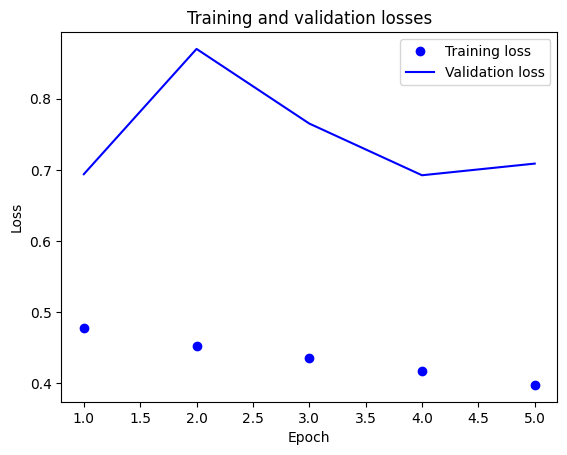

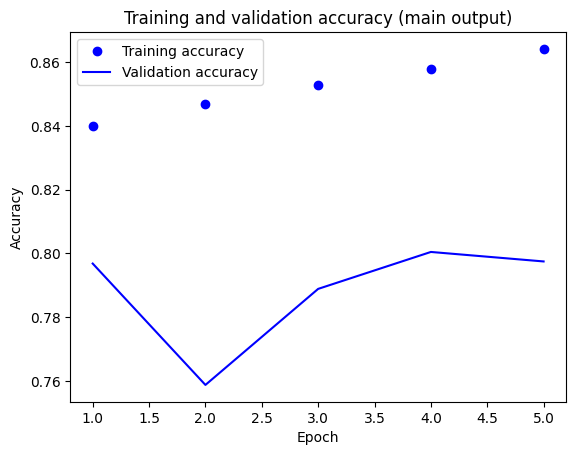

"# Plot the auxiliary outputs accuracy\nplt.plot(epochs, aux1_accuracy, 'bo', label='Training accuracy (aux 1)')\nplt.plot(epochs, aux2_accuracy, 'go', label='Training accuracy (aux 2)')\nplt.plot(epochs, val_aux1_accuracy, 'b', label='Validation accuracy (aux 1)')\nplt.plot(epochs, val_aux2_accuracy, 'g', label='Validation accuracy (aux 2)')\nplt.title"

In [176]:
import matplotlib.pyplot as plt

# Extract the losses and accuracy
loss = history3.history['loss']
val_loss = history3.history['val_loss']
accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']


# Plot the losses
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the main output accuracy
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy (main output)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

'''# Plot the auxiliary outputs accuracy
plt.plot(epochs, aux1_accuracy, 'bo', label='Training accuracy (aux 1)')
plt.plot(epochs, aux2_accuracy, 'go', label='Training accuracy (aux 2)')
plt.plot(epochs, val_aux1_accuracy, 'b', label='Validation accuracy (aux 1)')
plt.plot(epochs, val_aux2_accuracy, 'g', label='Validation accuracy (aux 2)')
plt.title'''


In [177]:
print("Loss: ",loss)
print("Val Loss: ",val_loss)
print("accuracy: ",accuracy)
print('val_accuracya',val_accuracy)

Loss:  [0.47734522819519043, 0.4522024393081665, 0.43489232659339905, 0.4176137447357178, 0.39755043387413025]
Val Loss:  [0.6938543319702148, 0.8699819445610046, 0.7650480270385742, 0.6923505067825317, 0.7087479829788208]
accuracy:  [0.8400844931602478, 0.846785843372345, 0.8526891469955444, 0.8577309846878052, 0.8641240000724792]
val_accuracya [0.7968233227729797, 0.7587690353393555, 0.7888815402984619, 0.8004632592201233, 0.7974851131439209]


In [178]:
mkdir 'inceptionv3_scratch_1_base_unfreezed_30_final'

In [179]:
# Save our model using specified conditions
checkpoint_filepath = 'inceptionv3_scratch_1_base_unfreezed_30_final'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
#checkpoint = ModelCheckpoint("checkpoints/vgg16_12.h5", monitor='accuracy', verbose=1, save_best_only=True )
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

In [180]:
# Train the model
history4 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples/val_generator.batch_size,
    epochs=10,callbacks=[model_checkpoint_callback,early]
)

Epoch 1/10
3447/3446 [==============================] - ETA: 0s - loss: 0.3825 - accuracy: 0.8688

INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30_final/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30_final/assets


3446/3446 [==============================] - 2381s 691ms/step - loss: 0.3825 - accuracy: 0.8688 - val_loss: 0.7633 - val_accuracy: 0.7955
Epoch 2/10
3447/3446 [==============================] - ETA: 0s - loss: 0.3661 - accuracy: 0.8733

INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30_final/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30_final/assets


3446/3446 [==============================] - 2403s 697ms/step - loss: 0.3661 - accuracy: 0.8733 - val_loss: 0.7574 - val_accuracy: 0.7988
Epoch 3/10
3447/3446 [==============================] - ETA: 0s - loss: 0.3508 - accuracy: 0.8788

INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30_final/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30_final/assets


3446/3446 [==============================] - 2361s 685ms/step - loss: 0.3508 - accuracy: 0.8788 - val_loss: 0.7843 - val_accuracy: 0.7991
Epoch 4/10
3446/3446 [==============================] - 2441s 708ms/step - loss: 0.3341 - accuracy: 0.8836 - val_loss: 0.7787 - val_accuracy: 0.7978
Epoch 5/10
3447/3446 [==============================] - ETA: 0s - loss: 0.3182 - accuracy: 0.8884

INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30_final/assets


INFO:tensorflow:Assets written to: inceptionv3_scratch_1_base_unfreezed_30_final/assets


3446/3446 [==============================] - 2471s 717ms/step - loss: 0.3182 - accuracy: 0.8884 - val_loss: 0.7542 - val_accuracy: 0.7995
Epoch 6/10
3446/3446 [==============================] - 2450s 711ms/step - loss: 0.3099 - accuracy: 0.8922 - val_loss: 0.8219 - val_accuracy: 0.7813
Epoch 7/10
3446/3446 [==============================] - 2437s 707ms/step - loss: 0.2932 - accuracy: 0.8970 - val_loss: 0.8563 - val_accuracy: 0.7929
Epoch 8/10
3446/3446 [==============================] - 2607s 756ms/step - loss: 0.2857 - accuracy: 0.9000 - val_loss: 0.8317 - val_accuracy: 0.7909
Epoch 9/10
3446/3446 [==============================] - 2601s 755ms/step - loss: 0.2724 - accuracy: 0.9049 - val_loss: 0.9083 - val_accuracy: 0.7826
Epoch 10/10
3446/3446 [==============================] - 2510s 728ms/step - loss: 0.2621 - accuracy: 0.9081 - val_loss: 0.9132 - val_accuracy: 0.7713


In [181]:
model.save('30_inceptionv3_epochs_40.h5')

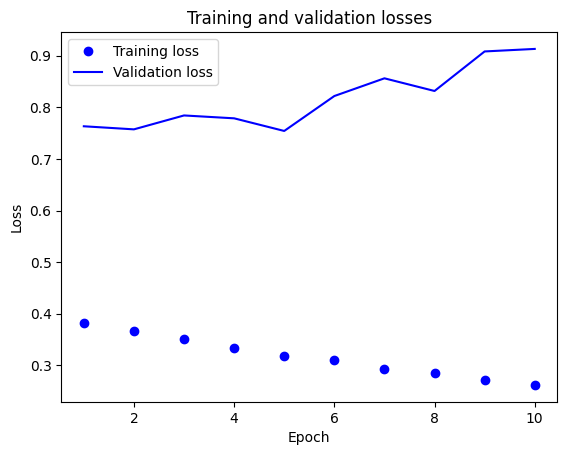

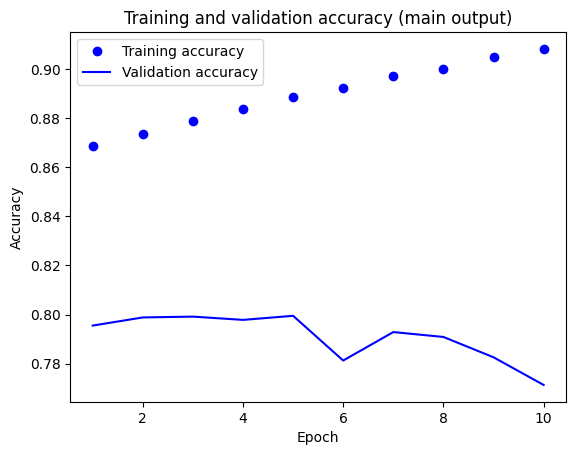

"# Plot the auxiliary outputs accuracy\nplt.plot(epochs, aux1_accuracy, 'bo', label='Training accuracy (aux 1)')\nplt.plot(epochs, aux2_accuracy, 'go', label='Training accuracy (aux 2)')\nplt.plot(epochs, val_aux1_accuracy, 'b', label='Validation accuracy (aux 1)')\nplt.plot(epochs, val_aux2_accuracy, 'g', label='Validation accuracy (aux 2)')\nplt.title"

In [182]:
import matplotlib.pyplot as plt

# Extract the losses and accuracy
loss = history4.history['loss']
val_loss = history4.history['val_loss']
accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']


# Plot the losses
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the main output accuracy
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy (main output)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

'''# Plot the auxiliary outputs accuracy
plt.plot(epochs, aux1_accuracy, 'bo', label='Training accuracy (aux 1)')
plt.plot(epochs, aux2_accuracy, 'go', label='Training accuracy (aux 2)')
plt.plot(epochs, val_aux1_accuracy, 'b', label='Validation accuracy (aux 1)')
plt.plot(epochs, val_aux2_accuracy, 'g', label='Validation accuracy (aux 2)')
plt.title'''


In [183]:
print("Loss: ",loss)
print("Val Loss: ",val_loss)
print("accuracy: ",accuracy)
print('val_accuracya',val_accuracy)

Loss:  [0.38246214389801025, 0.3660980463027954, 0.35079634189605713, 0.33412474393844604, 0.3182215392589569, 0.30991131067276, 0.2931930720806122, 0.2857280969619751, 0.2724251449108124, 0.2620830237865448]
Val Loss:  [0.7633188366889954, 0.7573534846305847, 0.784296989440918, 0.778735339641571, 0.7542422413825989, 0.8219268918037415, 0.8562620282173157, 0.8317056894302368, 0.9083371758460999, 0.9132218360900879]
accuracy:  [0.8687577843666077, 0.8733008503913879, 0.8787961006164551, 0.8835568428039551, 0.8884173631668091, 0.8921987414360046, 0.8969866633415222, 0.9000063538551331, 0.9048758745193481, 0.9080950617790222]
val_accuracya [0.7954996824264526, 0.798808753490448, 0.7991396188735962, 0.7978160381317139, 0.7994705438613892, 0.7812706828117371, 0.7928524017333984, 0.7908669710159302, 0.7825943231582642, 0.771343469619751]


In [187]:
val_loss = [1.7204636335372925, 1.5438376665115356, 1.552994966506958, 1.525382399559021, 1.6189565658569336, 1.5975548028945923, 1.5729107856750488, 1.495980143547058, 1.5573333501815796, 1.6890968084335327, 1.6624488830566406, 1.600062608718872, 1.6295619010925293, 1.5671969652175903, 1.6702425479888916, 1.0133216381072998, 0.7822964191436768, 0.8348361253738403, 0.7587438225746155, 0.7632513046264648, 0.7820045351982117, 0.7071326971054077, 0.7780682444572449, 0.6961055994033813, 0.8031215667724609, 0.6938543319702148, 0.8699819445610046, 0.7650480270385742, 0.6923505067825317, 0.7087479829788208, 0.7633188366889954, 0.7573534846305847, 0.784296989440918, 0.778735339641571, 0.7542422413825989, 0.8219268918037415, 0.8562620282173157, 0.8317056894302368, 0.9083371758460999, 0.9132218360900879] 
val_accuracy = [0.47551289200782776, 0.535737931728363, 0.552945077419281, 0.5562541484832764, 0.553276002407074, 0.5436796545982361, 0.5334215760231018, 0.552945077419281, 0.5251489281654358, 0.5165453553199768, 0.5052945017814636, 0.570152223110199, 0.4927200675010681, 0.5350760817527771, 0.5241562128067017, 0.7035076022148132, 0.7690271139144897, 0.7554599642753601, 0.771343469619751, 0.7723361849784851, 0.7723361849784851, 0.7878888249397278, 0.7706816792488098, 0.7951687574386597, 0.7723361849784851, 0.7968233227729797, 0.7587690353393555, 0.7888815402984619, 0.8004632592201233, 0.7974851131439209, 0.7954996824264526, 0.798808753490448, 0.7991396188735962, 0.7978160381317139, 0.7994705438613892, 0.7812706828117371, 0.7928524017333984, 0.7908669710159302, 0.7825943231582642, 0.771343469619751]
loss = [2.0224039554595947, 1.7195402383804321, 1.7042477130889893, 1.706387996673584, 1.6956425905227661, 1.6982080936431885, 1.684386968612671, 1.6851897239685059, 1.6958770751953125, 1.695129632949829, 1.6923545598983765, 1.694110631942749, 1.6906235218048096, 1.676079511642456, 1.6883430480957031, 1.2509444952011108, 0.9096187949180603, 0.7929843664169312, 0.7185515761375427, 0.6652600765228271, 0.6225888133049011, 0.5784253478050232, 0.5509761571884155, 0.5223663449287415, 0.49594593048095703,0.47734522819519043, 0.4522024393081665, 0.43489232659339905, 0.4176137447357178, 0.39755043387413025, 0.38246214389801025, 0.3660980463027954, 0.35079634189605713, 0.33412474393844604, 0.3182215392589569, 0.30991131067276, 0.2931930720806122, 0.2857280969619751, 0.2724251449108124, 0.2620830237865448]
accuracy = [0.43569374084472656, 0.4787580370903015, 0.48593994975090027, 0.4847792387008667, 0.4887601137161255, 0.4905737340450287, 0.4933122992515564, 0.49169817566871643, 0.48901402950286865, 0.49074602127075195, 0.4899933934211731, 0.4922150671482086, 0.49168911576271057, 0.49808210134506226, 0.49118128418922424, 0.6171549558639526, 0.7176564335823059, 0.7501382827758789, 0.7705596089363098, 0.7861838936805725, 0.7969295382499695, 0.8096702098846436, 0.8174415230751038, 0.8258748650550842, 0.832929790019989, 0.8400844931602478, 0.846785843372345, 0.8526891469955444, 0.8577309846878052, 0.8641240000724792, 0.8687577843666077, 0.8733008503913879, 0.8787961006164551, 0.8835568428039551, 0.8884173631668091, 0.8921987414360046, 0.8969866633415222, 0.9000063538551331, 0.9048758745193481, 0.9080950617790222]

In [188]:
print(len(val_loss))
print(len(val_accuracy))
print(len(loss))
print(len(accuracy))

40
40
40
40


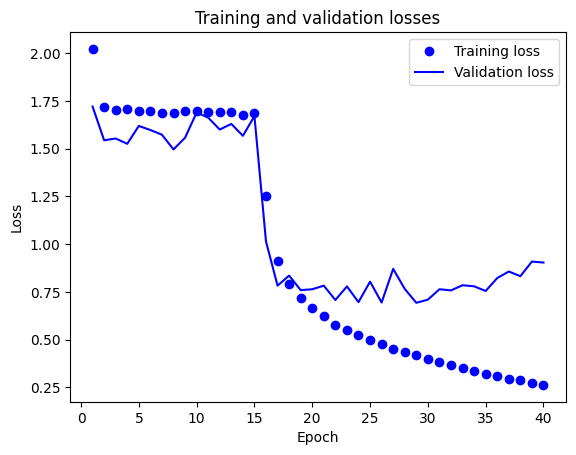

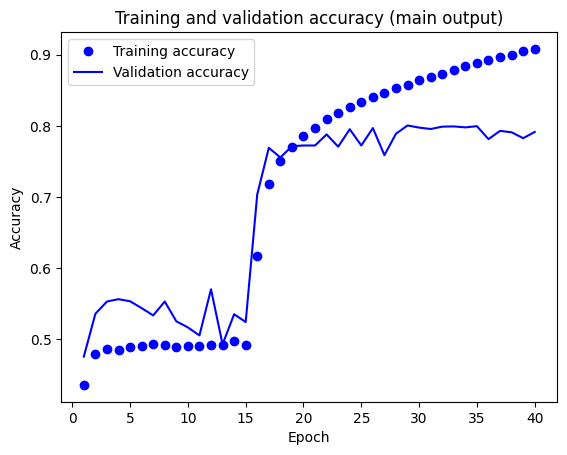

In [189]:
# Plot the losses
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the main output accuracy
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy (main output)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
